### optimize using PyTorch

In [1]:
%matplotlib inline

In [2]:
import torch
from matplotlib import pyplot as plt

from data_generator import magic_function # function to create the dataset

In [3]:
torch.__version__ # notebook run on version '1.1.0'

'1.1.0'

In [4]:
def genereate_X_y(N):
    """
        generates `N` samples of data
    """
    Xs=[]
    ys=[]
    for _ in range(N):
        x=torch.randn(1).item()
        x_sq=x**2
        Xs.append((x,x_sq))
        y=magic_function(x) # we dont know the relation between x and y
        ys.append(y) 
    # create tensors from the data
    X=torch.tensor(Xs, dtype=torch.float32)
    Y=torch.tensor(ys, dtype=torch.float32)
    return X,Y

In [5]:
X,Y=genereate_X_y(1000)

In [6]:
X.shape, Y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [7]:
# few entries from the data
display(X[:5], Y[:5])

tensor([[-0.8934,  0.7981],
        [ 0.1483,  0.0220],
        [-0.7897,  0.6236],
        [ 0.5132,  0.2633],
        [ 0.5519,  0.3045]])

tensor([-2.5374, -1.2281, -2.5432, -0.0511,  0.0956])

In [8]:
# unknowns/parameters/weights that we will learn
a=torch.randn((1,), requires_grad=True)
b=torch.randn((1,), requires_grad=True)
c=torch.randn((1,), requires_grad=True)

In [9]:
print(f"Initial parameter values:\n a: {a.item():.4f},\n b: {b.item():.4f},\n c: {c.item():.4f}")

Initial parameter values:
 a: -1.9163,
 b: -0.0429,
 c: -2.0980


In [10]:
# PyTorch optimizer
optimizer=torch.optim.SGD(params=[a,b,c], lr=1e-5)
#optimizer=torch.optim.Adam(params=[a,b,c], lr=1e-5)

In [11]:
# optimization procedure1 - run `n_iterations` of the optimization 
n_iterations=1000
losses=[]
for i in range(n_iterations):
    x,x_sq,y=X[:,0],X[:,1],Y
    guess=a*x_sq+b*x+c
    loss=torch.matmul(guess-y, guess-y).mean() # calculate the loss
    optimizer.zero_grad() # housekeeping
    loss.backward() # calculate the gradients
    optimizer.step() # update the parameters
    losses.append(loss.item())

In [12]:
print(f"Final parameter values (after {n_iterations} iterations):\n a: {a.item():.4f},\n b: {b.item():.4f},\n c: {c.item():.4f}")

Final parameter values (after 1000 iterations):
 a: 1.4000,
 b: 2.3000,
 c: -1.6000


In [13]:
print(f"Initial loss: {losses[0]:.4f}, final loss:{losses[-1]:.4f}")

Initial loss: 49656.9297, final loss:0.0000


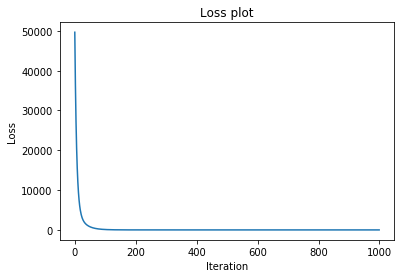

In [14]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss plot");

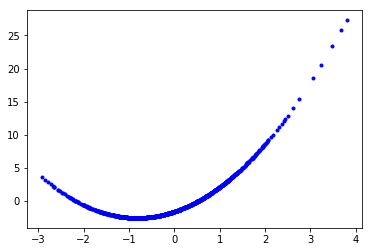

In [15]:
plt.plot(X[:,0].tolist(),Y.tolist(), 'b.');

### looking under the hood
We remove the optimizer provided by PyTorch and do the computation ourselves

In [16]:
%matplotlib inline

In [17]:
import torch
from matplotlib import pyplot as plt

from data_generator import magic_function # function to create the dataset

In [18]:
def genereate_X_y(N):
    """
        generates `N` samples of data
    """
    Xs=[]
    ys=[]
    for _ in range(N):
        x=torch.randn(1).item()
        x_sq=x**2
        Xs.append((x,x_sq))
        y=magic_function(x) # we dont know the relation between x and y
        ys.append(y) 
    # create tensors from the data
    X=torch.tensor(Xs, dtype=torch.float32)
    Y=torch.tensor(ys, dtype=torch.float32)
    return X,Y

In [19]:
X,Y=genereate_X_y(1000)

In [20]:
X.shape, Y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [21]:
# few entries from the data
display(X[:5], Y[:5])

tensor([[ 0.3166,  0.1002],
        [ 0.1616,  0.0261],
        [ 0.7635,  0.5829],
        [-1.0619,  1.1276],
        [-0.0935,  0.0087]])

tensor([-0.7316, -1.1918,  0.9720, -2.4637, -1.8028])

In [22]:
# unknowns/parameters/weights that we will learn
a=torch.randn((1,), requires_grad=True)
b=torch.randn((1,), requires_grad=True)
c=torch.randn((1,), requires_grad=True)

In [23]:
print(f"Initial parameter values:\n a: {a.item():.4f},\n b: {b.item():.4f},\n c: {c.item():.4f}")

Initial parameter values:
 a: -0.9182,
 b: -0.7094,
 c: -0.3575


In [24]:
def optimize_weights(loss, weights, lr):
    """
        compute gradients and update the weights
    """
    a,b,c=weights
    # below is what optimizer.zero_grad() does
    a.grad=None
    b.grad=None
    c.grad=None
    
    loss.backward() # calculate the gradients
    
    # below is what optimizer.step() does
    
    a.data=a.data-lr*a.grad
    b.data=b.data-lr*b.grad
    c.data=c.data-lr*c.grad

In [25]:
# optimization procedure2 - run `n_iterations` of the optimization 
n_iterations=1000
losses=[]
for i in range(n_iterations):
    x,x_sq,y=X[:,0],X[:,1],Y
    guess=a*x_sq+b*x+c
    loss=torch.matmul(guess-y, guess-y).mean() # calculate the loss
#     optimizer.zero_grad() # housekeeping
#     loss.backward() # calculate the gradients
#     optimizer.step() # update the parameters
    optimize_weights(loss=loss, weights=[a,b,c], lr=1e-5) # do the parameter update outselves
    losses.append(loss.item())

In [26]:
print(f"Final parameter values (after {n_iterations} iterations):\n a: {a.item():.4f},\n b: {b.item():.4f},\n c: {c.item():.4f}")

Final parameter values (after 1000 iterations):
 a: 1.4000,
 b: 2.3000,
 c: -1.6000


In [27]:
print(f"Initial loss: {losses[0]:.4f}, final loss:{losses[-1]:.4f}")

Initial loss: 20382.8633, final loss:0.0000


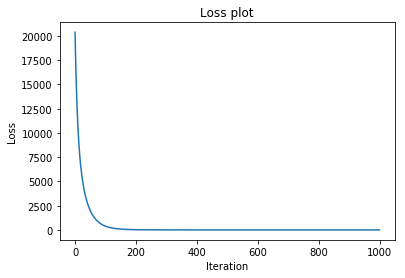

In [28]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss plot");

### homework

* Prove to yourself that this optimization works
  * You can try changing values of `a`, `b` and `c` (in `magic_function`) and check if optimization procedure1 converges to the correct values
* Try using a diffent optimizer
  * `Adam` is another optimizer like `SGD`, that is popular. Try using `Adam` instead of `SGD`. You might have to tweak the learning rate
* Why do we need `optimizer.zero_grad()`?
  * Comment it out and run optimization procedure1. Will you get the right answer for `a`, `b` and `c`?

### playing around using the debugger (`pdb`)
Here we will use Python's debugger (`pdb`) to execute line by line and confirm what line does

**`pdb` (Python Debugger) cheatsheet**
* `pdb.set_trace()` - put this in your code where you want to start debugging (You will have to `import pdb` first)
* `n(ext)` - next line
* `c(ontinue)` - run till the next breakpoint
* `l` - list source code around current line
* `h` - help
* `q` - quit the debugger

In [29]:
%matplotlib inline

In [30]:
import torch
from matplotlib import pyplot as plt

import pdb # Python Debugger

from data_generator import magic_function # function to create the dataset

In [31]:
def genereate_X_y(N):
    """
        generates `N` samples of data
    """
    Xs=[]
    ys=[]
    for _ in range(N):
        x=torch.randn(1).item()
        x_sq=x**2
        Xs.append((x,x_sq))
        y=magic_function(x) # we dont know the relation between x and y
        ys.append(y) 
    # create tensors from the data
    X=torch.tensor(Xs, dtype=torch.float32)
    Y=torch.tensor(ys, dtype=torch.float32)
    return X,Y

In [32]:
X,Y=genereate_X_y(1000)

In [33]:
X.shape, Y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [34]:
# few entries from the data
display(X[:5], Y[:5])

tensor([[ 0.2782,  0.0774],
        [-0.8860,  0.7850],
        [ 1.8827,  3.5447],
        [ 0.7893,  0.6230],
        [-1.1781,  1.3880]])

tensor([-0.8519, -2.5388,  7.6928,  1.0875, -2.3665])

In [35]:
# unknowns/parameters/weights that we will learn
a=torch.randn((1,), requires_grad=True)
b=torch.randn((1,), requires_grad=True)
c=torch.randn((1,), requires_grad=True)

In [36]:
print(f"Initial parameter values:\n a: {a.item():.4f},\n b: {b.item():.4f},\n c: {c.item():.4f}")

Initial parameter values:
 a: -1.6333,
 b: 0.5439,
 c: 1.2220


In [37]:
# PyTorch optimizer
optimizer=torch.optim.SGD(params=[a,b,c], lr=1e-5)
#optimizer=torch.optim.Adam(params=[a,b,c], lr=1e-5)

In [38]:
# optimization procedure1 - run `n_iterations` of the optimization 
n_iterations=1000
losses=[]
for i in range(n_iterations):
    # pdb.set_trace() # uncomment this to set a breakpoint here
    x,x_sq,y=X[:,0],X[:,1],Y
    guess=a*x_sq+b*x+c
    loss=torch.matmul(guess-y, guess-y).mean() # calculate the loss
    optimizer.zero_grad() # housekeeping
    loss.backward() # calculate the gradients
    optimizer.step() # update the parameters
    losses.append(loss.item())

In [39]:
print(f"Final parameter values (after {n_iterations} iterations):\n a: {a.item():.4f},\n b: {b.item():.4f},\n c: {c.item():.4f}")

Final parameter values (after 1000 iterations):
 a: 1.4000,
 b: 2.3000,
 c: -1.6000


In [40]:
print(f"Initial loss: {losses[0]:.4f}, final loss:{losses[-1]:.4f}")

Initial loss: 21927.5859, final loss:0.0000


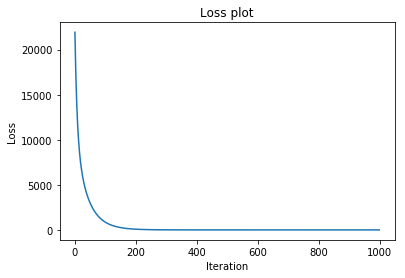

In [41]:
plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss plot");

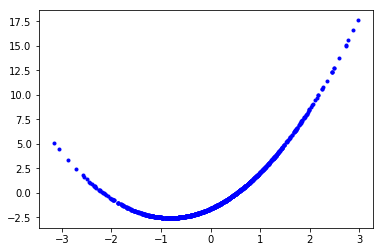

In [42]:
plt.plot(X[:,0].tolist(),Y.tolist(), 'b.');